In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import libpysal as lps
from scipy.spatial.distance import pdist, squareform
from sklearn.neighbors import KernelDensity

import matplotlib.dates as mdates

In [2]:
# read zipfile
df = pd.read_csv('data/data_selection_17_23.csv')

In [3]:
df['dt']=pd.to_datetime(df['timestamp'], unit='s')    
df['datetime'] = df['dt'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [386]:
# start label df 
df['anomaly_temperature']=False
df['anomaly_humidity']=False    
df['anomaly_voltage']=False
df['anomaly_light']=False


In [387]:
# all temperature above 30 is anomaly
df.loc[df['temperature']>38,'anomaly_temperature']=True
# all temperature below 10 is anomaly
df.loc[df['temperature']<10,'anomaly_temperature']=True
# all missing temperature is anomaly
# df.loc[df['temperature'].isnull(),'anomaly_temperature']=True
# node 4 after 7500 is anomaly
df.loc[(df['nodeid']==4),'anomaly_temperature'][7500:]=True
# node 6 after 7500 is anomaly
df.loc[(df['nodeid']==6),'anomaly_temperature'][7500:]=True
# node 13 after 14000 is anomaly
df.loc[(df['nodeid']==13),'anomaly_temperature'][14000:]=True
# node 15 is anomaly
df.loc[(df['nodeid']==15),'anomaly_temperature']=True
# node 16 is anomaly
df.loc[(df['nodeid']==16),'anomaly_temperature']=True
# node 17 is anomaly
df.loc[(df['nodeid']==17),'anomaly_temperature']=True
# node 18 is anomaly
df.loc[(df['nodeid']==18),'anomaly_temperature']=True
# node 19 after 7500 is anomaly
df.loc[(df['nodeid']==19),'anomaly_temperature'][7500:]=True
# node 19 first 2000 is anomaly
df.loc[np.logical_and(df['nodeid']==19,df.index<=107964),'anomaly_temperature']=True
# node 20 is anomaly
df.loc[(df['nodeid']==20),'anomaly_temperature']=True
# node 21 after 14000 is anomaly
df.loc[(df['nodeid']==21),'anomaly_temperature'][14000:]=True
# node 27 has anomaly from 14500 to 15000 where temperature >20.50
select_node=df.loc[df['nodeid']==27,'temperature'][14500:15000]
df.loc[(select_node[select_node>20.50]).index,'anomaly_temperature']=True
# node 35 after 7500 is anomaly
df.loc[(df['nodeid']==35),'anomaly_temperature'][7500:]=True
# node 40 / index 905079 is anomaly
df.loc[905079,'anomaly_temperature']=True
# node 46 after 13500 is anomaly
df.loc[(df['nodeid']==46),'anomaly_temperature'][13500]=True

# if temperature is NaN, then it is not anomaly
df.loc[df['temperature'].isnull(),'anomaly_temperature']=False


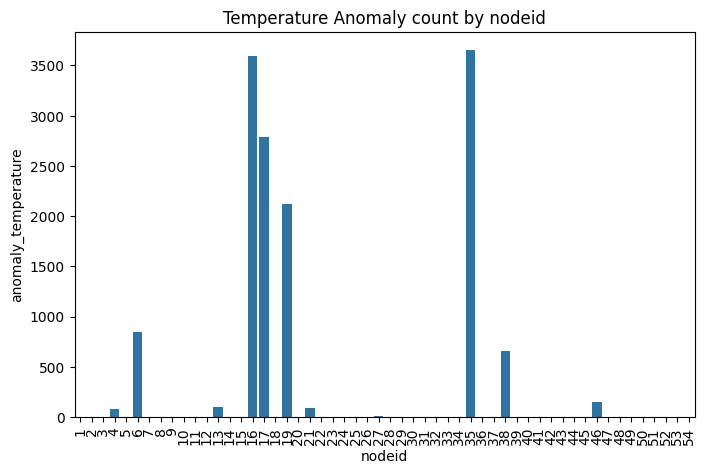

In [395]:
# plot anomaly count by node id
plt.figure(figsize=(8,5))
sns.barplot(x='nodeid', y='anomaly_temperature', data=df.groupby('nodeid')['anomaly_temperature'].sum().reset_index())
plt.title('Temperature Anomaly count by nodeid')
# rotate the x-axis
plt.xticks(rotation=90)
plt.show()

In [390]:
# save df
df.to_csv('./data/manual_label.csv',index=False)

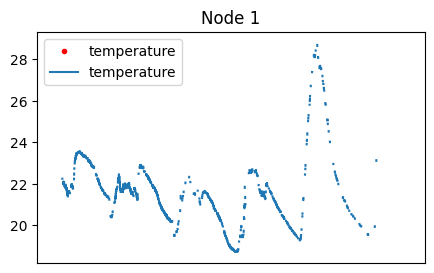

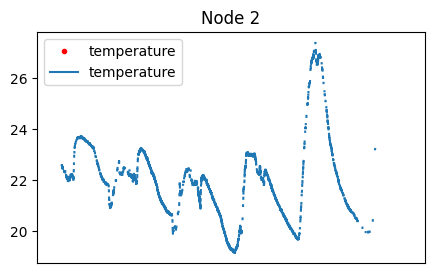

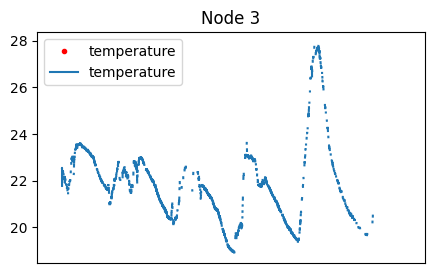

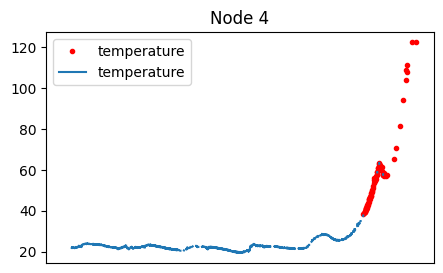

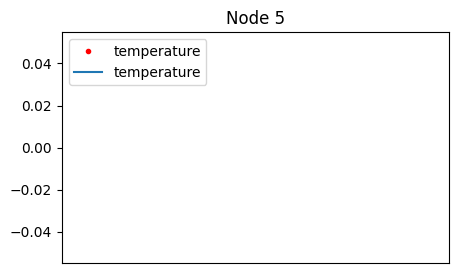

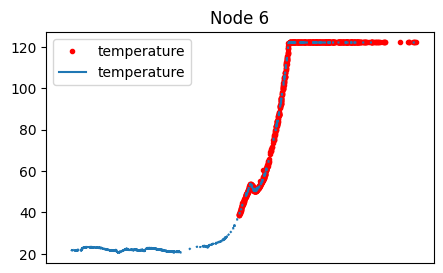

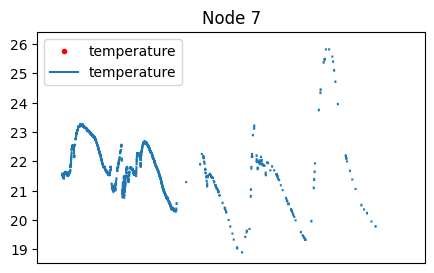

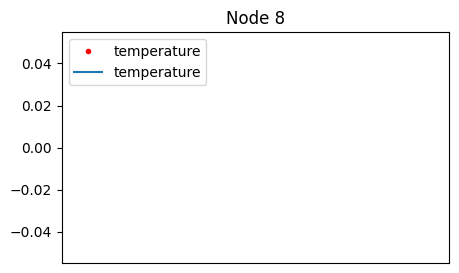

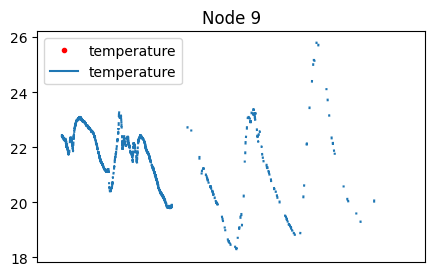

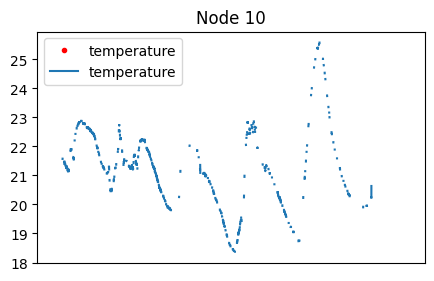

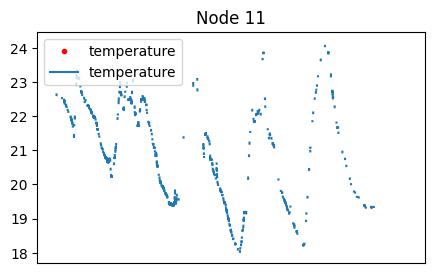

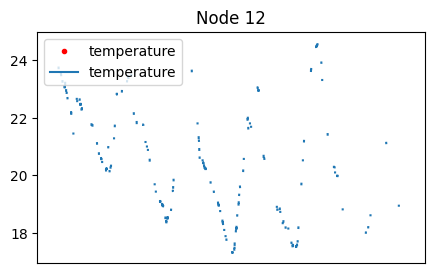

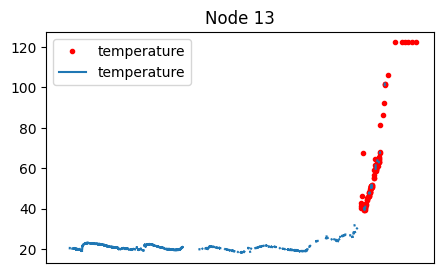

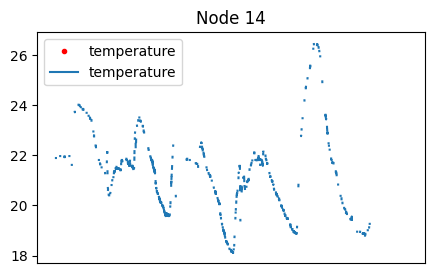

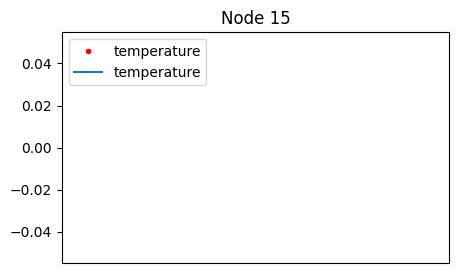

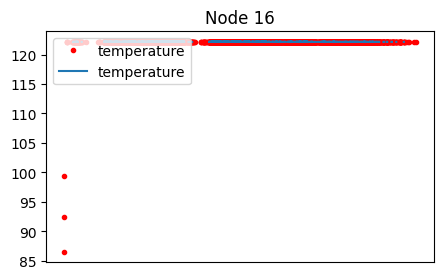

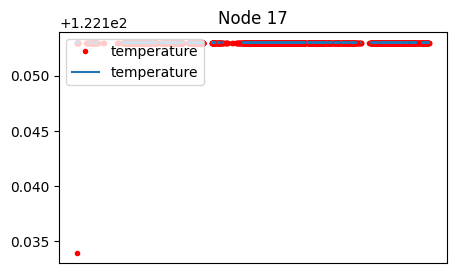

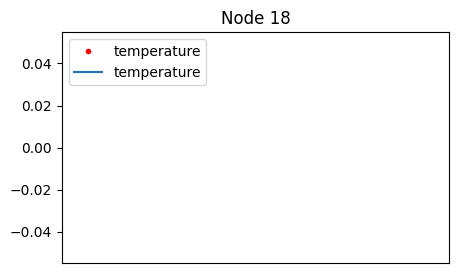

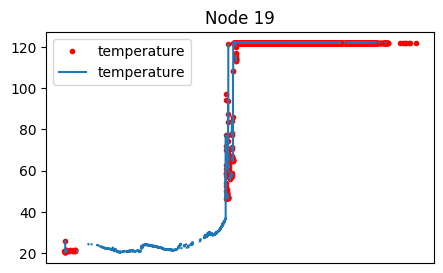

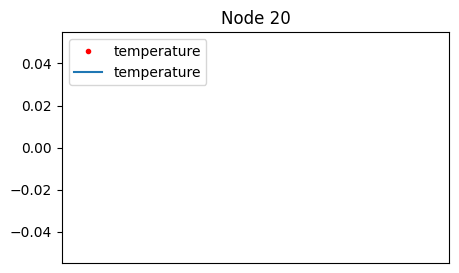

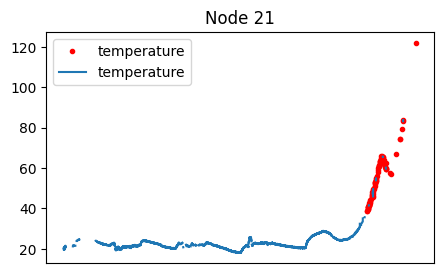

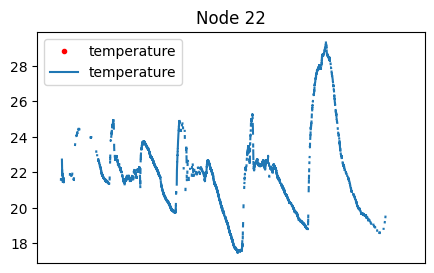

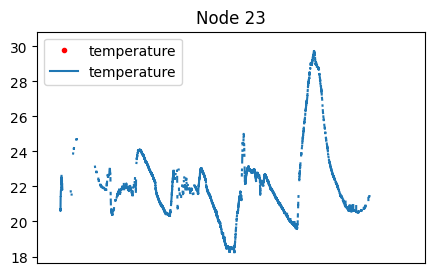

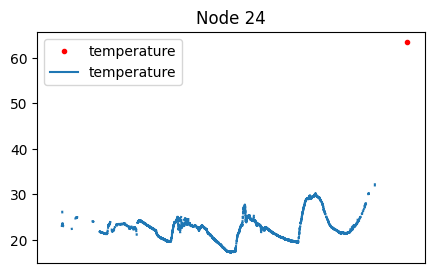

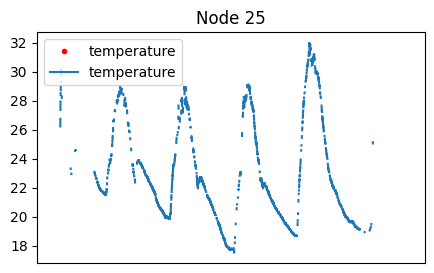

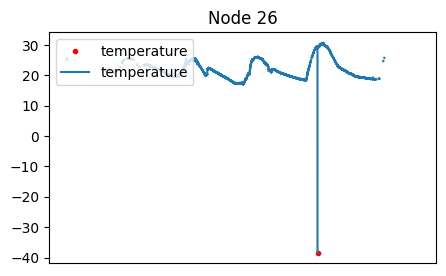

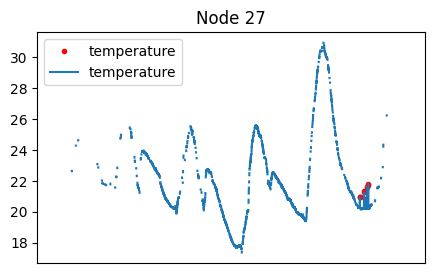

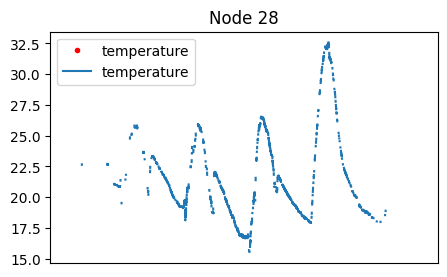

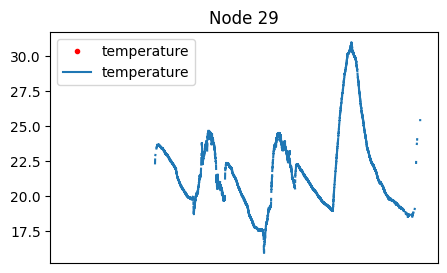

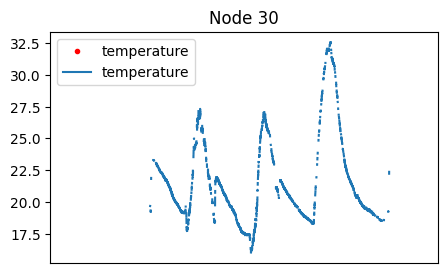

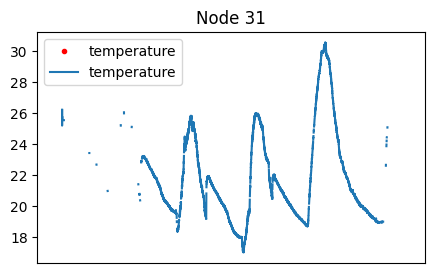

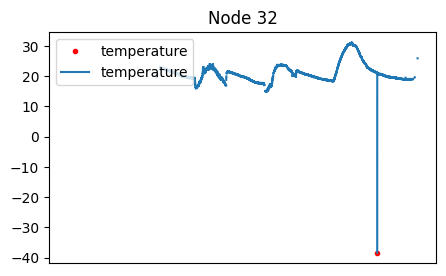

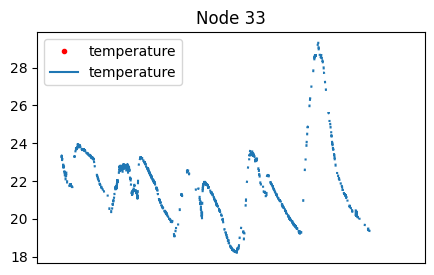

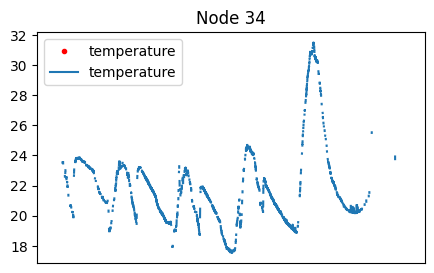

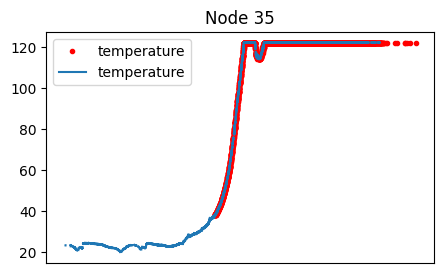

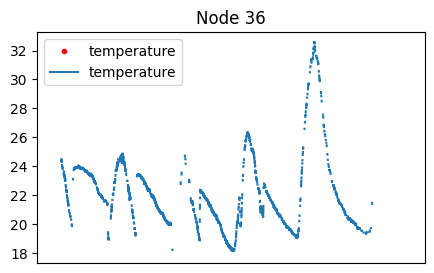

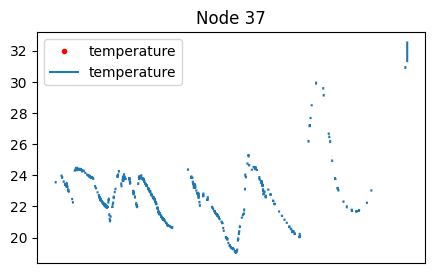

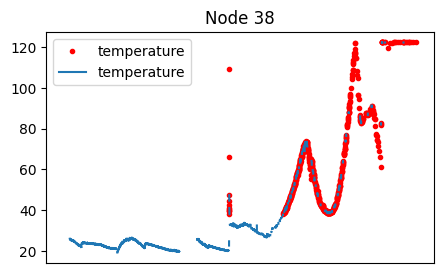

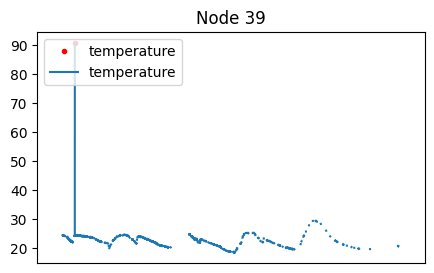

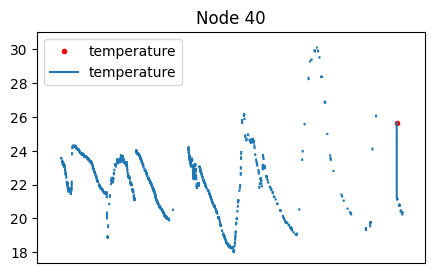

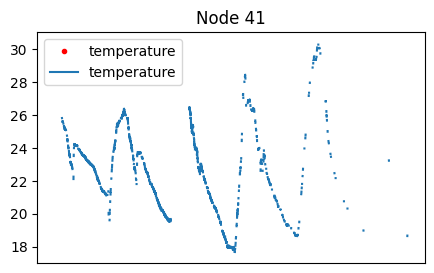

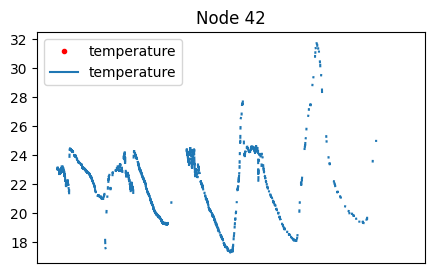

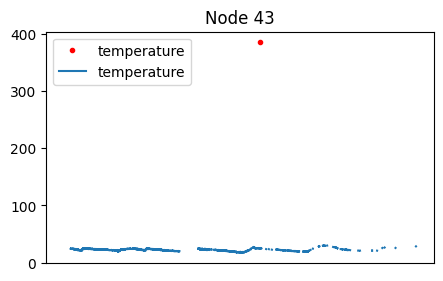

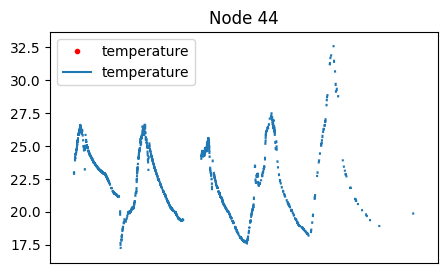

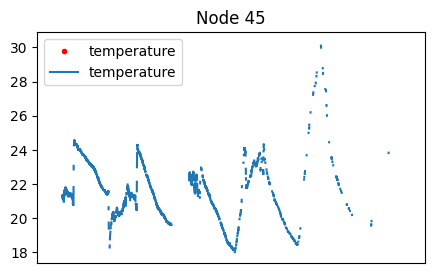

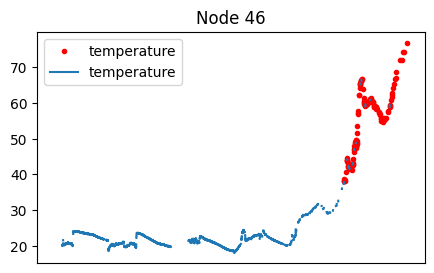

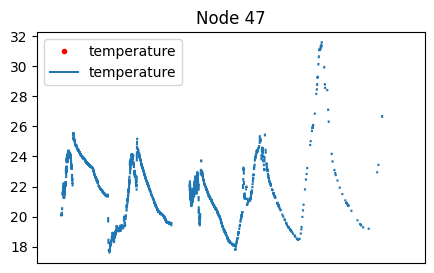

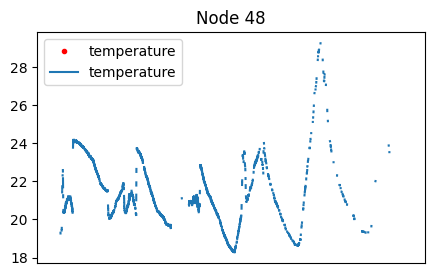

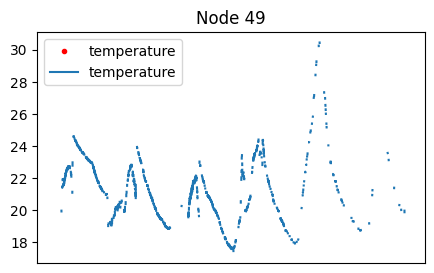

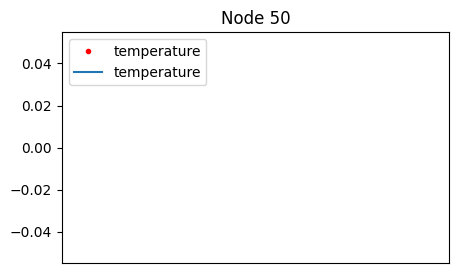

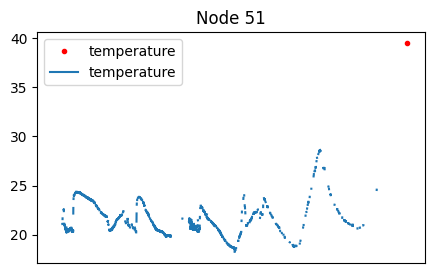

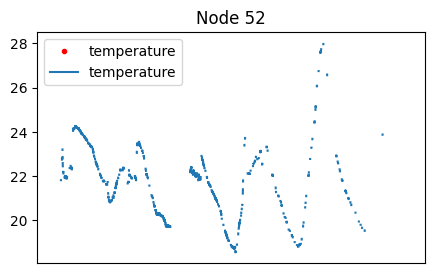

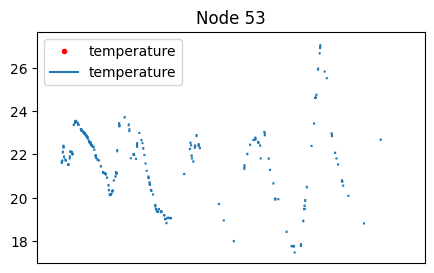

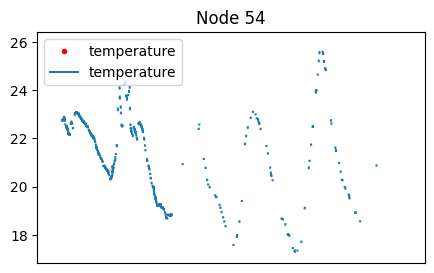

In [400]:
# show temperature by nodeid

for idx in range(1,55):
    plt.figure(figsize=(5,3))
    data=df[df['nodeid']==idx]
    # filter out the anomaly data
    anomaly_data = data[data['anomaly_temperature']==True]
    anomaly_data['temperature'].plot(style='r.')
    data['temperature'].plot()
    
    plt.legend(loc='upper left')
    plt.title('Node '+str(idx))
    # don't show x-axis
    plt.xticks([])
    # plt.xticks(rotation=45)
    plt.show()